<a href="https://colab.research.google.com/github/marcocmcmelo/binarizacao/blob/main/binarizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

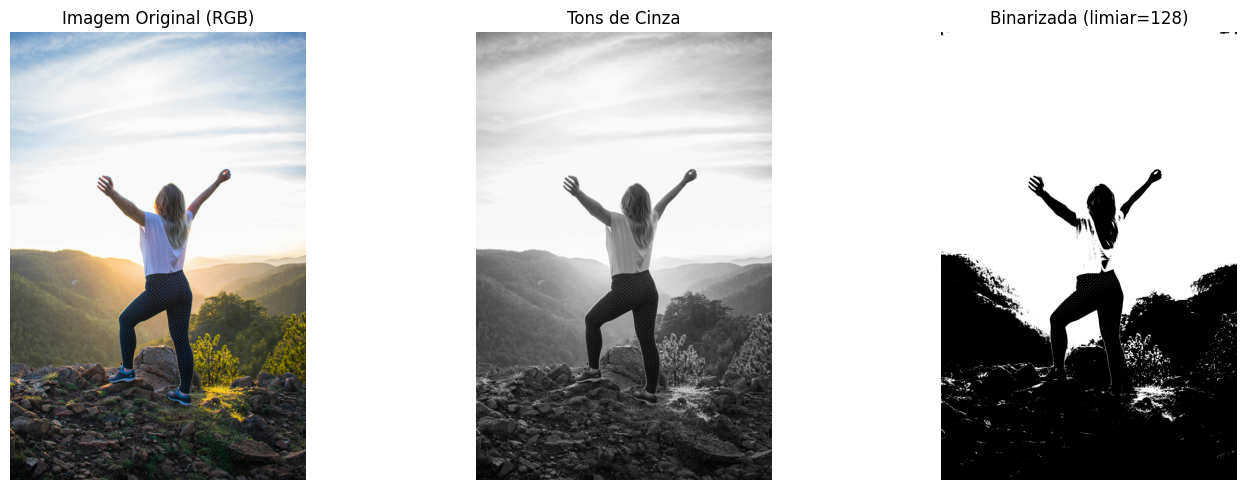

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def rgb_para_cinza(imagem):
    """
    Converte uma imagem RGB (3 canais) para tons de cinza (1 canal).
    Usa a fórmula ponderada: Y = 0.299*R + 0.587*G + 0.114*B
    Entrada: array 3D (altura, largura, 3) com valores RGB
    Saída: array 2D (altura, largura) com valores de 0 a 255 (uint8)
    """
    if len(imagem.shape) != 3 or imagem.shape[2] != 3:
        raise ValueError("A imagem deve ser RGB com 3 canais.")

    # Extrair canais R, G, B
    R = imagem[:, :, 0]
    G = imagem[:, :, 1]
    B = imagem[:, :, 2]

    # Aplicar fórmula de luminância
    cinza = 0.299 * R + 0.587 * G + 0.114 * B

    # Converter para uint8 (0-255)
    cinza = np.clip(cinza, 0, 255).astype(np.uint8)

    return cinza


def binarizar(imagem_cinza, limiar=128):
    """
    Converte uma imagem em tons de cinza para binária (0 ou 255).
    Entrada: array 2D (tons de cinza)
    Saída: array 2D binário (0 ou 255)
    """
    if len(imagem_cinza.shape) != 2:
        raise ValueError("A imagem deve ser em tons de cinza (2D).")

    # Aplicar limiar: se >= limiar -> 255 (branco), senão 0 (preto)
    binaria = np.where(imagem_cinza >= limiar, 255, 0).astype(np.uint8)

    return binaria


# =============================
# Exemplo de uso
# =============================

# Carregar imagem (use uma imagem colorida no mesmo diretório)
# Exemplo: 'imagem.jpg'
imagem_path = '/content/saude.jpg'  # <-- substitua pelo caminho da sua imagem

# Carregar com matplotlib (retorna float entre 0 e 1)
img = plt.imread(imagem_path)

# Se a imagem estiver no intervalo [0,1], converter para [0,255]
if img.max() <= 1.0:
    img = (img * 255).astype(np.uint8)

# Converter para cinza
img_cinza = rgb_para_cinza(img)

# Binarizar com limiar 128
img_binaria = binarizar(img_cinza, limiar=128)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagem Original (RGB)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_cinza, cmap='gray')
plt.title("Tons de Cinza")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_binaria, cmap='gray')
plt.title("Binarizada (limiar=128)")
plt.axis('off')

plt.tight_layout()
plt.show()